Copied from Kaggle - https://www.kaggle.com/selfvivek/environment-impact-of-food-production

Some inspiration gained from this analysis - https://www.kaggle.com/selfvivek/choose-your-food-wisely

Context

As the world’s population has expanded and gotten richer, the demand for food, energy and water has seen a rapid increase. Not only has demand for all three increased, but they are also strongly interlinked: food production requires water and energy; traditional energy production demands water resources; agriculture provides a potential energy source. This article focuses on the environmental impacts of food. Ensuring everyone in the world has access to a nutritious diet in a sustainable way is one of the greatest challenges we face.
Content

This dataset contains most 43 most common foods grown across the globe and 23 columns as their respective land, water usage and carbon footprints.

Columns

    Land use change - Kg CO2 - equivalents per kg product
    Animal Feed - Kg CO2 - equivalents per kg product
    Farm - Kg CO2 - equivalents per kg product
    Processing - Kg CO2 - equivalents per kg product
    Transport - Kg CO2 - equivalents per kg product
    Packaging - Kg CO2 - equivalents per kg product
    Retail - Kg CO2 - equivalents per kg product

These represent greenhouse gas emissions per kg of food product(Kg CO2 - equivalents per kg product) across different stages in the lifecycle of food production.

Eutrophication – the pollution of water bodies and ecosystems with excess nutrients – is a major environmental problem. The runoff of nitrogen and other nutrients from agricultural production systems is a leading contributor.
Acknowledgements

https://ourworldindata.org
Inspiration

    Which types of food have more negative impact on the environment?
    What types of food production should be encouraged to consume nutritious diet in a sustainable way?
    Which stage of food production contributes more to the greenhouse gas emmision?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('C:\\Users\\Taylor\\Documents\\ProgramsAndScripts\\DataSets\\Food_Production.csv')

In [4]:
data.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [8]:
data.isna().sum()

Food product                                                                0
Land use change                                                             0
Animal Feed                                                                 0
Farm                                                                        0
Processing                                                                  0
Transport                                                                   0
Packging                                                                    0
Retail                                                                      0
Total_emissions                                                             0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals per 1000kcal (liters per 1000kcal)       

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Land use change,43.0,1.260465,3.357730,-2.100000,0.000000,0.200000,0.800000,16.300000
Animal Feed,43.0,0.453488,0.919200,0.000000,0.000000,0.000000,0.000000,2.900000
Farm,43.0,3.469767,7.083264,0.100000,0.350000,0.800000,2.200000,39.400000
Processing,43.0,0.253488,0.372475,0.000000,0.000000,0.100000,0.300000,1.300000
Transport,43.0,0.195349,0.158795,0.000000,0.100000,0.100000,0.200000,0.800000
Packging,43.0,0.269767,0.342633,0.000000,0.100000,0.100000,0.300000,1.600000
Retail,43.0,0.069767,0.110270,0.000000,0.000000,0.000000,0.150000,0.300000
Total_emissions,43.0,5.972093,10.501753,0.200000,0.850000,1.600000,6.000000,59.600000
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),33.0,27.181547,46.445959,0.708419,4.214932,7.000000,26.324324,197.357143
Eutrophying emissions per kilogram (gPO₄eq per kilogram),38.0,46.141316,82.808808,0.690000,3.752500,11.460000,45.840000,365.290000


Which types of food have more negative impact on the environment?

    Environmental impacts 
        - total emissions
        - eutrophic emissions
        - land use
        - water withdrawals
        
This question is really concerned with net impact, so our main concern is with measures that look at total usage (rather than effeciency metrics). Bar Charts are a great way to compare foods based on different

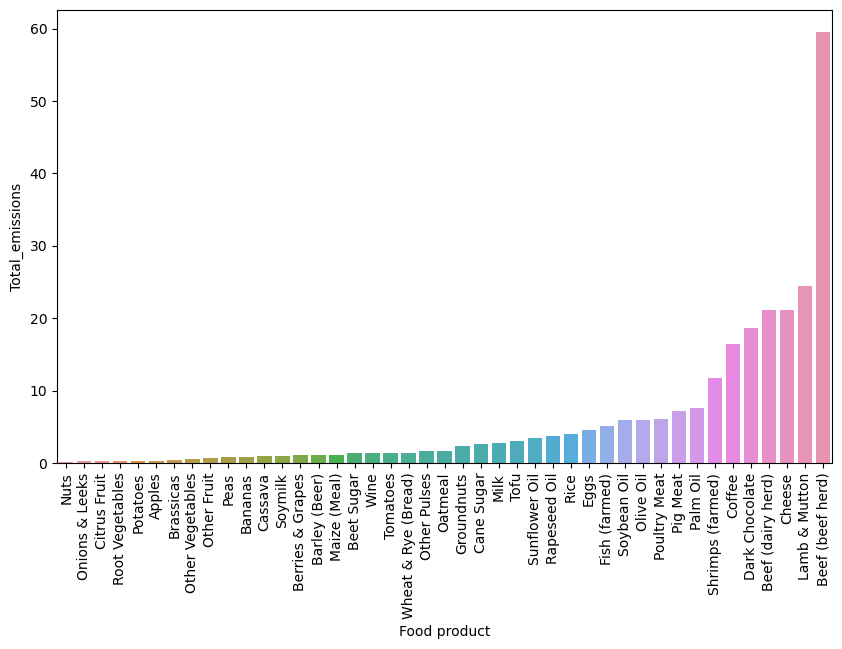

In [39]:
plt.figure(figsize = (10,6), dpi = 100)
sns.barplot(data = data.sort_values(by = 'Total_emissions'), x = 'Food product', y = 'Total_emissions')
plt.xticks(rotation = 90)
plt.show()

I think these plots reveal how this question is a bit complicated. The answer to this changes a bit based on which measures you value. In terms of total emissions, land use and eutrophying emissions, meat products (and beef specifically) are the most impactful. Its worth pointing out, however that coffee and chocolate are also quite impactful by each of these measures.  Niavely, I would think that there would be a stark contrast on emissions based on if something is a plant or animal product, and this seems to be mostly true, with the exception of Chocolate and Coffee.

Which stage of food production contributes more to the greenhouse gas emmision?

In looking at this we can create a bar chart seperated by production stage. This will show us which stage most affects total emissions of each 

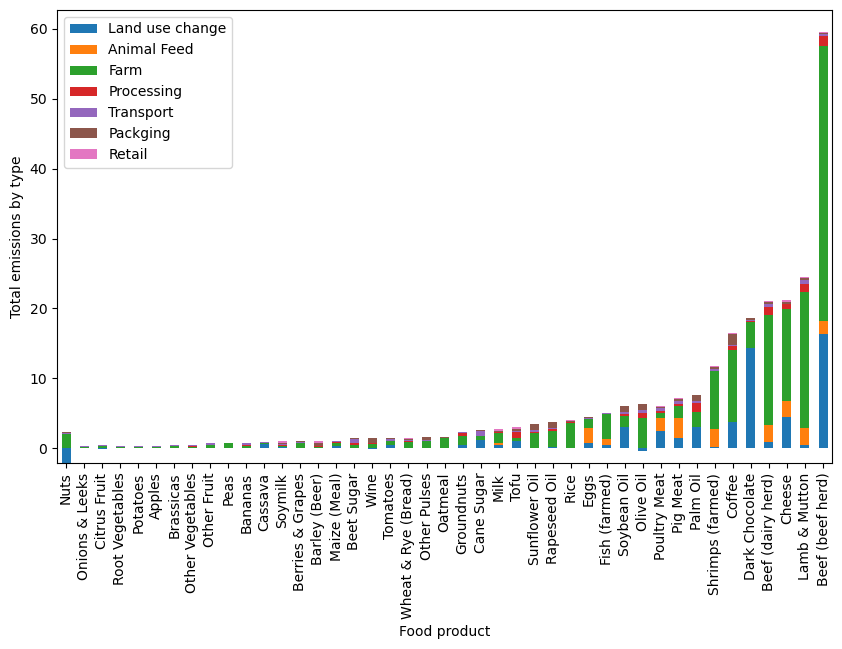

In [51]:
df = data.set_index('Food product').iloc[:,0:8].sort_values(by = 'Total_emissions')

fig, ax = plt.subplots(figsize =(10,6), dpi = 100 )
df.iloc[:,0:7].plot.bar(stacked = True, ax = ax)
plt.ylabel('Total emissions by type')
plt.show()

For nearly every type of food, it is the farming process itself that contributes most to greenhouse gases. The biggest excemption is dark chocolate, where land use change is the biggest contributor.

From here, we can already see that dropping meats from our diets (particularly beef) would have a huge effect in reducing our carbon footprints. Beef contributes far more to emissions than any other source of green house gasses. Of course, almost every kind of meat byproduct contributes much more to emissions than plants, so plant-based diets would do a lot to reduce carbon footprint. However, there could be some nuance here. It will be helpful to visualize nutrition based measures to see effecient these foods are in providing nutrition vs usage of resources and emissions.

Next we are going to take a look at our Eutrophying emissions to get an idea of the nutrient polution thurst into the environment from our different food sources. We will look at this both by kcal and by 100g of protien

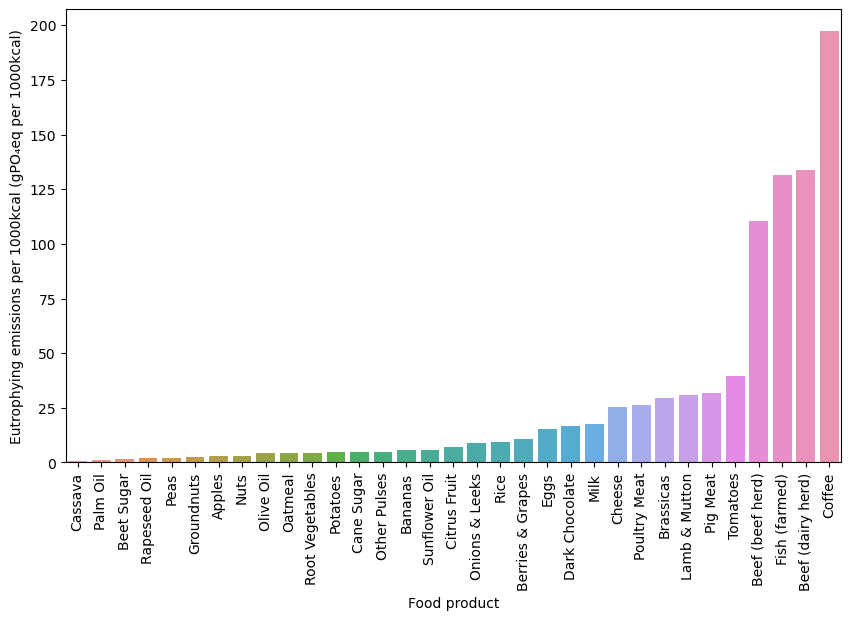

In [55]:
col_name = 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)'
plt.figure(figsize = (10,6), dpi = 100)
sns.barplot(data = data.dropna(subset = [col_name]).sort_values(by = col_name), x = 'Food product', y = col_name)
plt.xticks(rotation = 90)
plt.show()

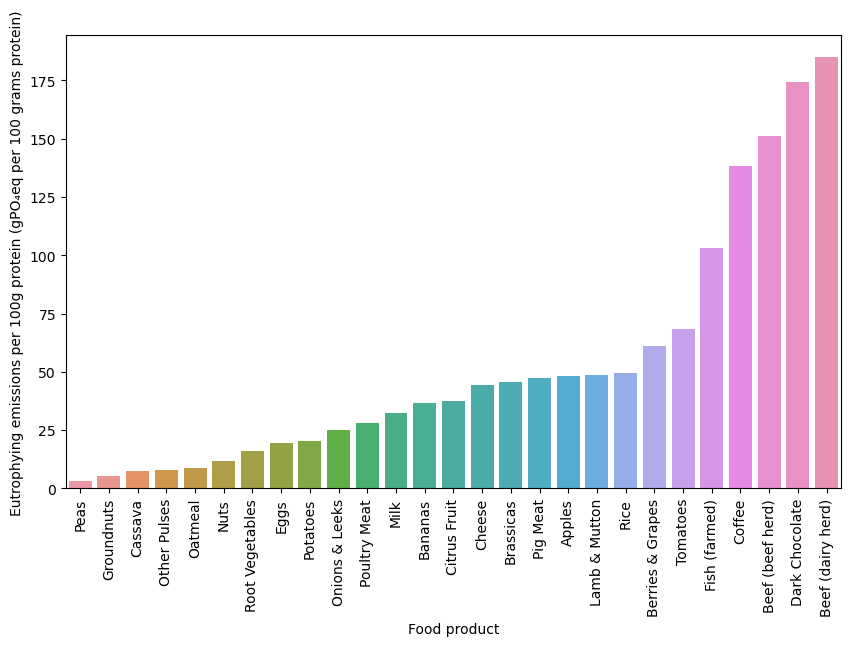

In [56]:
col_name = 'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)'
plt.figure(figsize = (10,6), dpi = 100)
sns.barplot(data = data.dropna(subset = [col_name]).sort_values(by = col_name), x = 'Food product', y = col_name)
plt.xticks(rotation = 90)
plt.show()

Here, we again have meat and meat by products dominating emissions, but there are some caveats. First, beef and fish stand out as driving the most eutrophic emissions among meats. However, Coffee stands out in terms of its own eutrophic emissions. This however might not be as bad as it seems, as coffee is consumed in small amounts and for the caffine content rather than for its caloric content. A bigger issue in this data is probably tomatoes and berries/grapes which are consumed for nutrition 

To keep centered on emissions, we will next take a look at Greenhouse gas emissions by effenciency mentric. This will better inform us if, perchance, the total emissions by meat are justified by getting much much more out of them in terms of calories and protein.

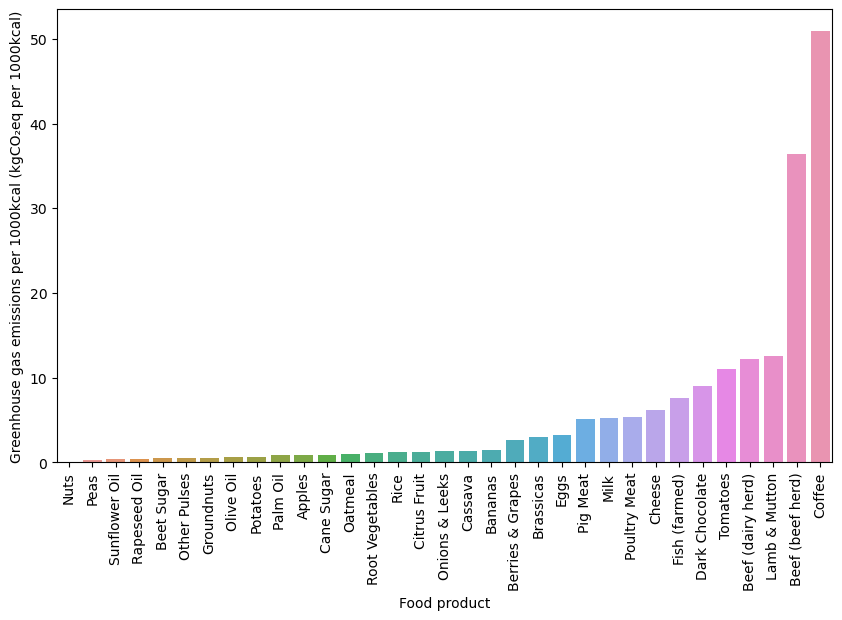

In [57]:
col_name = 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)'
plt.figure(figsize = (10,6), dpi = 100)
sns.barplot(data = data.dropna(subset = [col_name]).sort_values(by = col_name), x = 'Food product', y = col_name)
plt.xticks(rotation = 90)
plt.show()

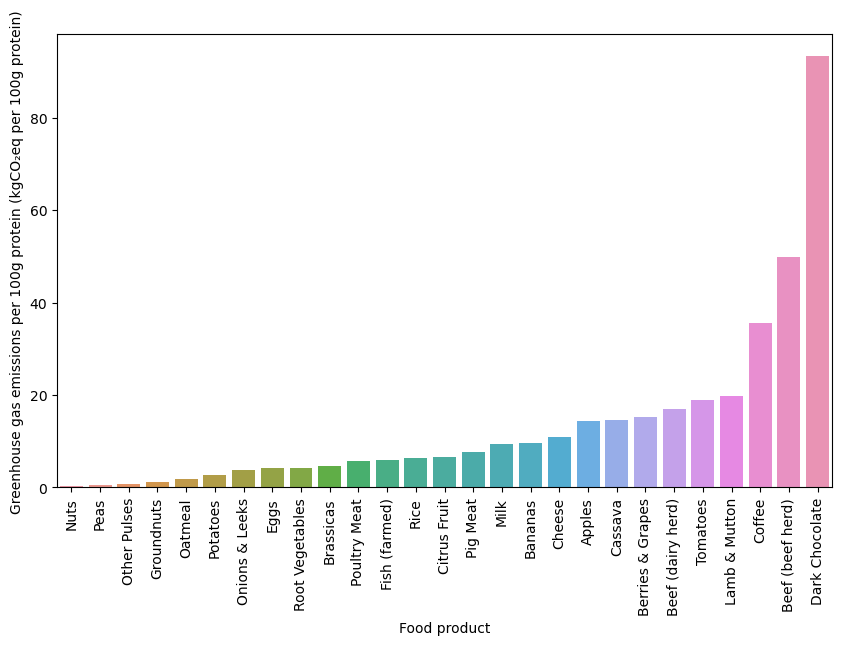

In [58]:
col_name = 'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)'
plt.figure(figsize = (10,6), dpi = 100)
sns.barplot(data = data.dropna(subset = [col_name]).sort_values(by = col_name), x = 'Food product', y = col_name)
plt.xticks(rotation = 90)
plt.show()

What is abundantly clear here is that, despite being so high in protein and calories, meat and meat byproducts are, as a whole, much less evironmentally effecient sources of these than their vegetarian equivalents. Specifically, nuts, peas, and pulses are excellent sources of protien for their greenhouse gas emissions.

Speical mention should be made of Chocolate and coffee, which are pretty terrible by these metrics, but this is less terrible than it looks becuase neither coffee or chocolate are consumed for their nutritional content. That being said, particularly in the case of chocolate, consumption of this should likely be limited.

Tomatoes are also an ineffieicnet food, particularly from amongst the plants. In contrast, Eggs and poultry are very effecient for meats.

Next we look at Land use and how effecient these are in terms of calories gained. This measure is important because it gives us perspectvie on how the limited land we have (particularly that which is useful for farming).

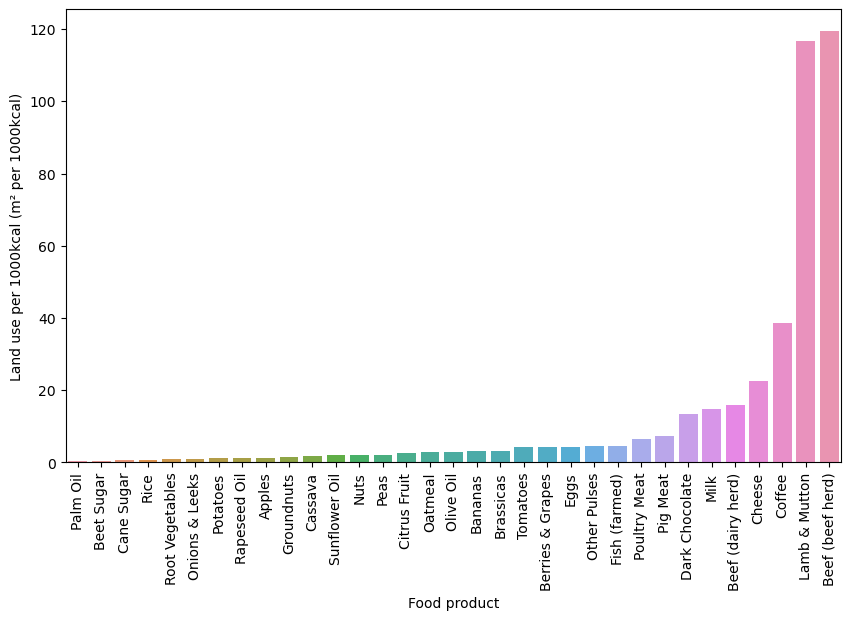

In [59]:
col_name = 'Land use per 1000kcal (m² per 1000kcal)'
plt.figure(figsize = (10,6), dpi = 100)
sns.barplot(data = data.dropna(subset = [col_name]).sort_values(by = col_name), x = 'Food product', y = col_name)
plt.xticks(rotation = 90)
plt.show()

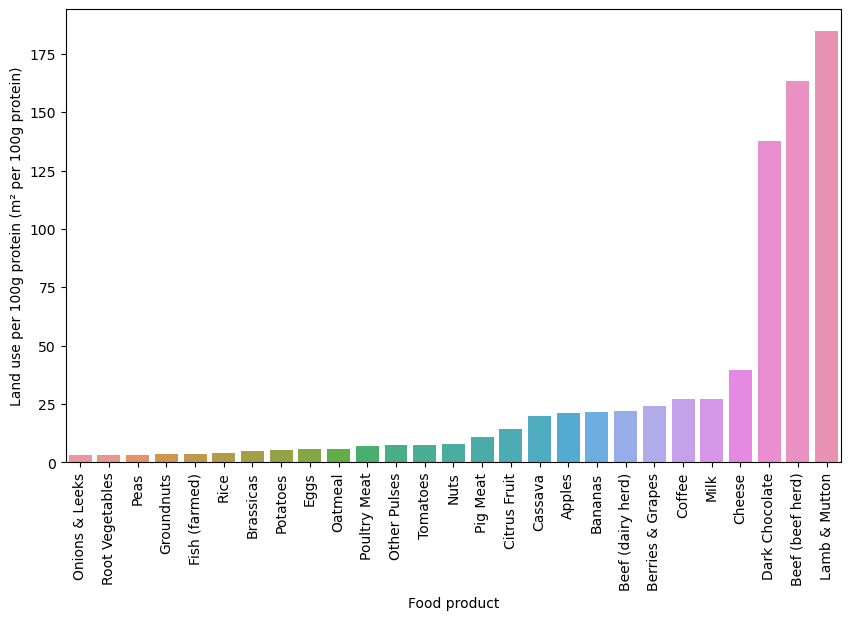

In [60]:
col_name = 'Land use per 100g protein (m² per 100g protein)'
plt.figure(figsize = (10,6), dpi = 100)
sns.barplot(data = data.dropna(subset = [col_name]).sort_values(by = col_name), x = 'Food product', y = col_name)
plt.xticks(rotation = 90)
plt.show()

Once again, we can see a narrative building, where meat and meat by producst (primarily beef related products) are the least effecient and plant-based alternatives are far more effecient. The important exception here is, once again, pultry, which takes very little land to grow. Tomatoes, by this measure, are just a bit below average on these effecieny metrics for plants.

Next, we look at water usage, both unweighted and scarcity weighted. This is an important measure becuase we can only allocate our freshwater resources in so many ways.

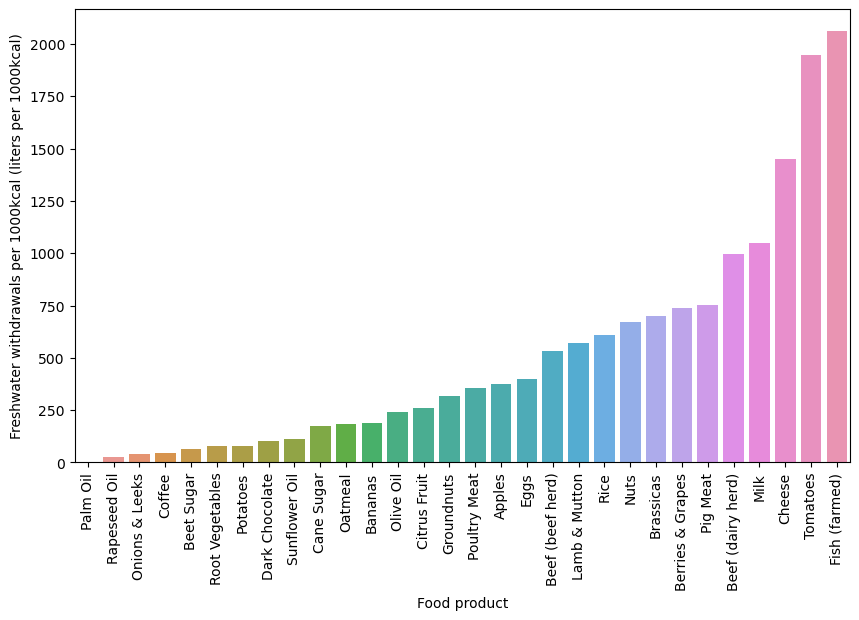

In [61]:
col_name = 'Freshwater withdrawals per 1000kcal (liters per 1000kcal)'
plt.figure(figsize = (10,6), dpi = 100)
sns.barplot(data = data.dropna(subset = [col_name]).sort_values(by = col_name), x = 'Food product', y = col_name)
plt.xticks(rotation = 90)
plt.show()

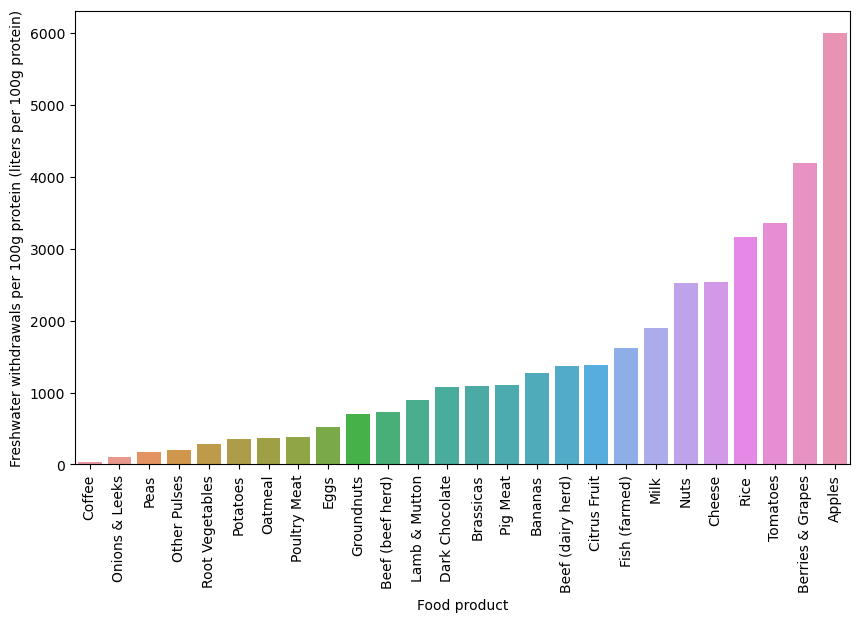

In [62]:
col_name = 'Freshwater withdrawals per 100g protein (liters per 100g protein)'
plt.figure(figsize = (10,6), dpi = 100)
sns.barplot(data = data.dropna(subset = [col_name]).sort_values(by = col_name), x = 'Food product', y = col_name)
plt.xticks(rotation = 90)
plt.show()

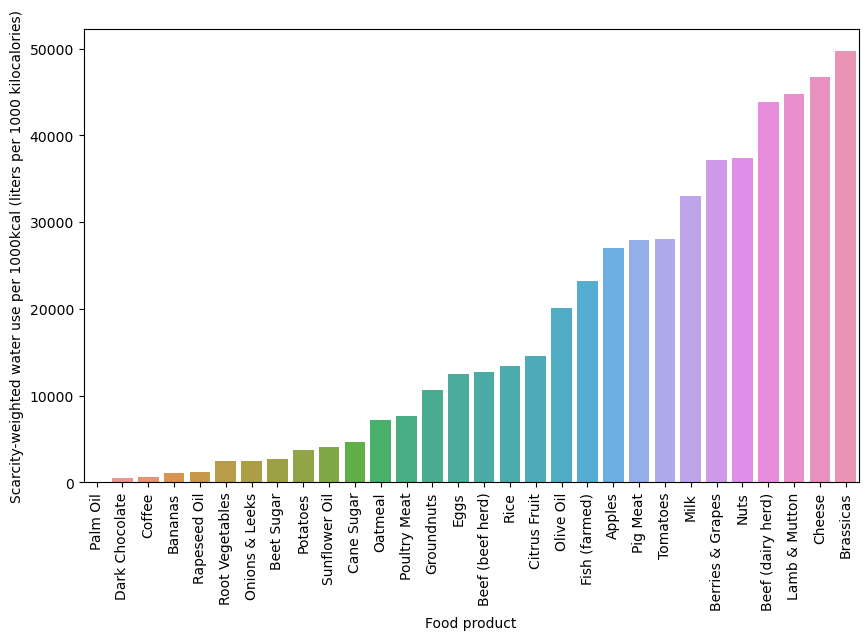

In [65]:
col_name = 'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)'
plt.figure(figsize = (10,6), dpi = 100)
sns.barplot(data = data.dropna(subset = [col_name]).sort_values(by = col_name), x = 'Food product', y = col_name)
plt.xticks(rotation = 90)
plt.show()

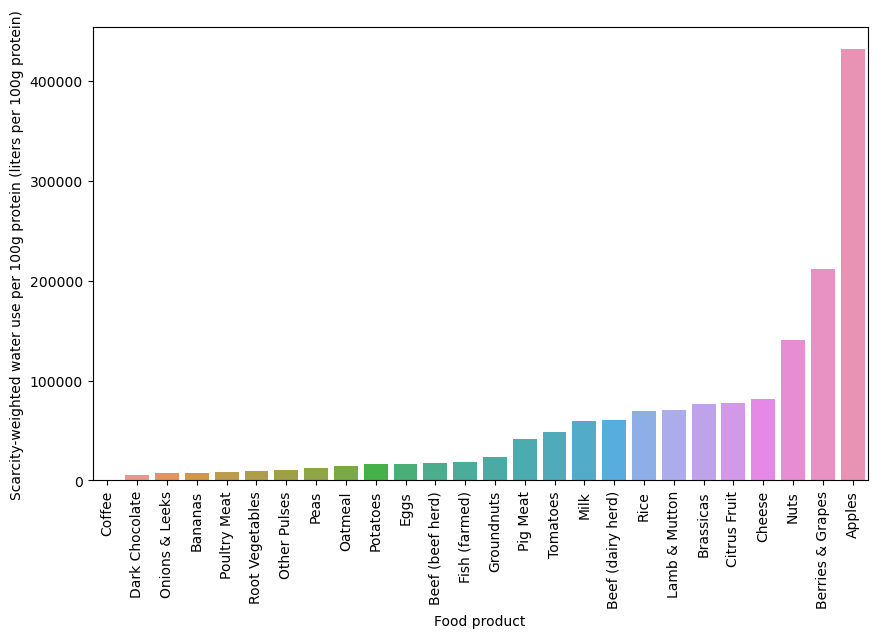

In [66]:
col_name = 'Scarcity-weighted water use per 100g protein (liters per 100g protein)'
plt.figure(figsize = (10,6), dpi = 100)
sns.barplot(data = data.dropna(subset = [col_name]).sort_values(by = col_name), x = 'Food product', y = col_name)
plt.xticks(rotation = 90)
plt.show()

Water use metrics stand in stark contrast with our other metrics in that they show a very different picture from the other metrics. Meats don't stand out as much water usage metrics. Instead there is a mix of plants and meats that stand out, particularly in our weighted measures.

For our non-weight water usage, fish and dairy products are the big offenders. Tomatoes in particular stand out by this mentric, using a relatively large amount of water per kilocalorie. Per 100 gram of protien, there are several fruits that stand out, but dairy products and nuts are also eccessive users, which is a larger issue since these are also high protien foods.

Scarcity weighting the water usage doesn't change the sotry too terribly much. Fruits, dairy, and nuts are the biggest users, while other foods use much less. This particular measure is important to consider because it shows the impact  of these foods in areas with lower amounts of water. 

Now lets check correlations between varaibles

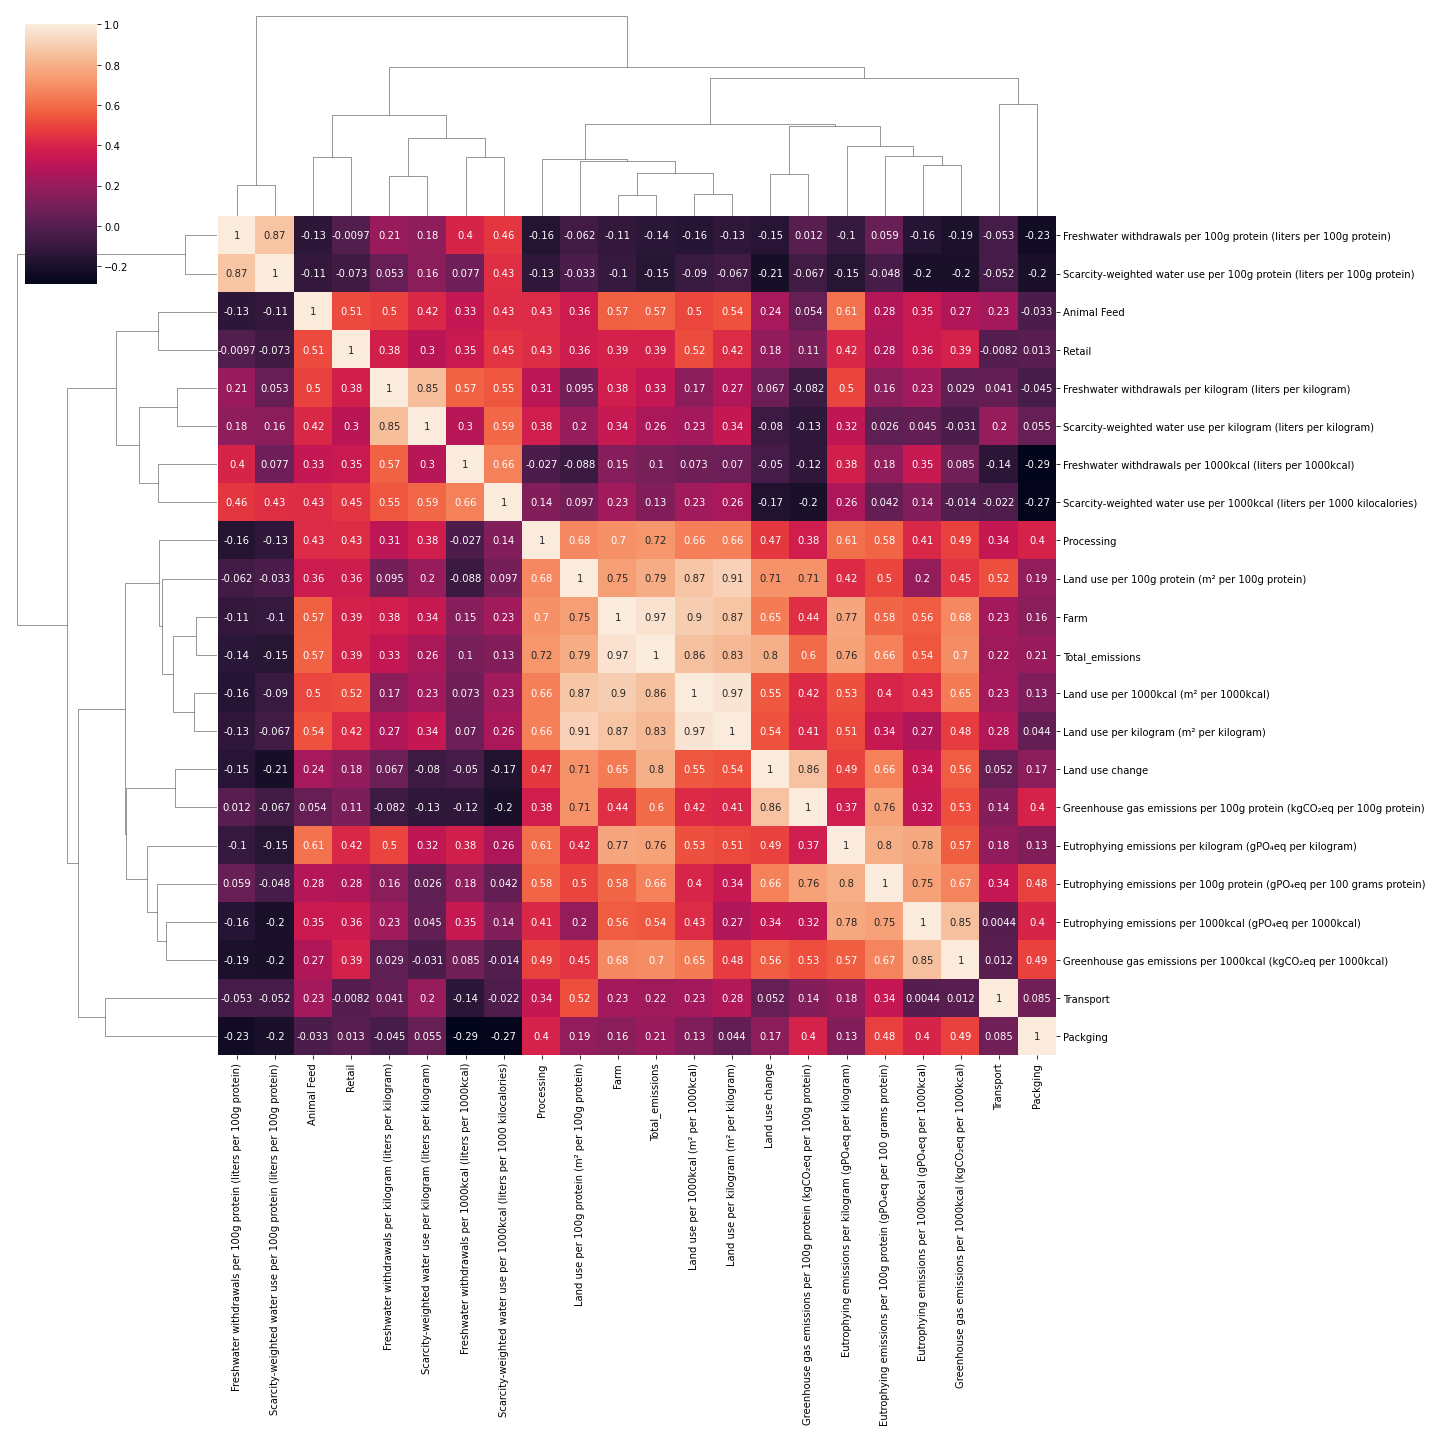

In [71]:
corrmat = data.corr()
sns.clustermap(data = corrmat, figsize = (20,20), annot = True)

This cluster map shows sets of variables that are highly correlated. Interestingly, though maybe not shocking, is that most of the correlations are at least moderately positive, so being environmentally harmful in any particular way implies that the food source will be harmful in other ways.

The most important take away from this analysis is that meat consumption (specifically beef and its by products), are the largest contributors to our food based carbon footprint. Efforts to reduce emissions as a species should include measures to address this consumption. There are some plants that have moderate degrees of pollution, but no plant really matches the meats in terms of environmental impact. 